In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from rw import scan_handler

rc('text', usetex=False)
rc('font', family='serif', size=20)
rc('figure', figsize=(12,8))
rc('axes',linewidth=2)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Reader

In [82]:
file_path = "/home/cmsdaq/Analysis/Data/RUN_6/processed_data/BAW_6_2.scan"    # series config, read S11 and S21
#file_path = "/home/cmsdaq/Analysis/Data/RUN_6/processed_data/BAW_6_1.scan"    # parallel config, read B
#file_path = "/home/cmsdaq/Analysis/Data/RUN_5/processed_data/BAW_5_8.scan"    # VNA 3 porte, 0-20 MHz
reader = scan_handler.ScanReader(file_path)        # create the object

In [83]:
# get the name list of all the resonances parameters 
print(reader.get_parameters_tags())

['C_baw', 'L_baw', 'Q', 'R_baw', 'R_par', 'asim', 'bw', 'depth', 'er_Q', 'er_asim', 'er_f0', 'er_gamma', 'er_norm', 'f0', 'fcenter', 'fmax', 'fmin', 'gamma', 'input_power', 'norm', 'npt', 'offset_at_peak', 'span', 'sweep', 'x']


In [84]:
# get the parameter Q for all the resonances as an array
R = reader.get_parameters('f0')
print(np.sort(R))

[-2.         -2.         -2.         -2.         -2.         -2.
 -2.          1.23471509  1.30839208  1.55164675  1.75104181  1.75921399
  1.831923    1.86795884  1.89722266  1.96531783  2.12107657  2.23971527
  2.51432621  2.54026692  2.59889449  2.63809074  2.74678738  2.98847324
  3.00470534  3.06876722  3.09821193  3.10987698  3.13218349  3.15250836
  3.21777814  3.22963015  3.23040263  3.44486167  3.90797888  3.91925954
  3.95211703  4.31736023  4.54174949  4.69806967  4.75966368  4.76730954
  4.93975663  4.99601913  4.99991412  4.99991416  5.08691105  5.09010711
  5.09400688  5.17416044  5.18152817  5.18368671  5.18961917  5.23807771
  5.26136388  5.287462    5.3572609   5.47727629  5.54810125  5.56065442
  5.57411222  5.62209503  5.64632664  5.65817734  5.67251548  5.69789558
  5.72406614  5.72554979  5.74454833  5.87020357  5.97068809  6.10341578
  6.14322614  6.30768548  6.92201552  7.12046757  7.13932067  7.3111886
  7.33898804  7.34362551  7.55624436  7.62031465  7.63620476

In [85]:
# get (as a python dictionary) all the resonance parameter. 
# you can get a resonance from its raw name
#           reader.get_resonance(name="resonance_10")
# you can get a resonance from its position inside the .scan
# e.g.: get the seventh resonance
#           reader.get_resonance(loc=7)
# you can get the resonance from its frequency (the middle frequency). 
# it gets the closest resonance to the selected frequency

resonance = reader.get_resonance(freq=5.8e6)

In [86]:
for key in resonance.keys():
    print(key)
print("The resonance called ",resonance['reso_name'] ," has a Q = ", resonance['Q'])

C_baw
L_baw
Q
R_baw
R_par
asim
bw
depth
er_Q
er_asim
er_f0
er_gamma
er_norm
f0
fcenter
fmax
fmin
gamma
input_power
norm
npt
offset_at_peak
span
sweep
x
freq
phase
power
reso_name
The resonance called  resonance_5389  has a Q =  18414224.494515706


## Useful(?) examples

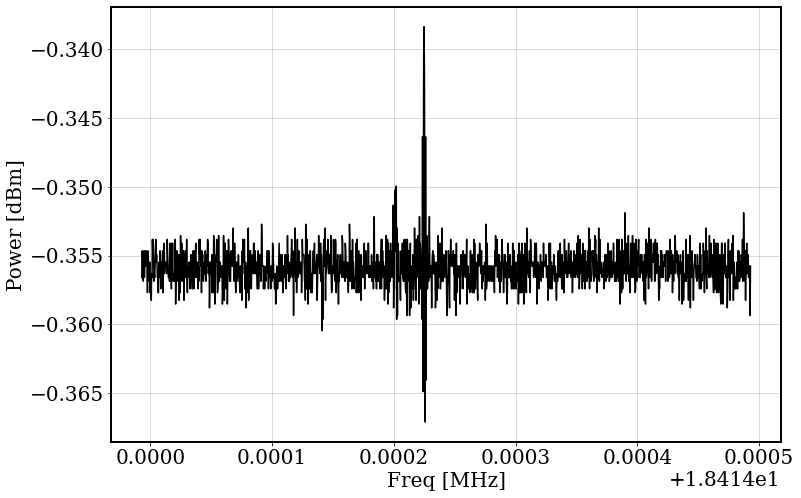

In [87]:
# plot the resonance at 5.66 MHz
reso = reader.get_resonance(freq=5.66e6)

plt.plot(reso['freq']*1e-6,reso['power'],c='k')
plt.xlabel('Freq [MHz]')
plt.ylabel('Power [dBm]')
plt.grid(alpha=0.6)
plt.show()

In [88]:
print(reso['R_baw'])
print(reso['R_par'])
print(reso['x'])

print(reso['depth'])


print(reso['C_baw'])
print(reso['L_baw'])

print(reso['f0'])

-14330.48566862571
50.17506407401063
0.2508745541866429
-0.015166050668407618
-3.275309549065766e-20
-2280.767609337655
18.414224669970785


conversion is: dBm-W
[ 4.60661701e-04  1.56250001e-06  1.84142258e+01 -1.29001627e-04
  9.23700021e-01  1.00000000e+00] 
 [[-1.00000000e-03  5.00000000e-07  1.84139930e+01 -1.29001627e-03
   9.23700021e-02  0.00000000e+00]
 [ 1.00000000e-03  5.00000000e-02  1.84144930e+01 -1.29001627e-05
   9.23700021e+00  1.00000000e+02]]
Parametro  1 :  -5.524637890713923e-09  +/-  1.3844087062476259e-09
Parametro  2 :  3.023051754937656e-06  +/-  8.436363495795129e-07
Parametro  3 :  18.414224747080237  +/-  1.11325942970428e-06
Parametro  4 :  -0.0001291250620935541  +/-  0.05509707335127359
Parametro  5 :  0.9236909394976345  +/-  1.0145709940061742
Parametro  6 :  1.4696079164117763  +/-  1.1191132037419902
Q = 3.05e+06  +/-  0.1841284106178406


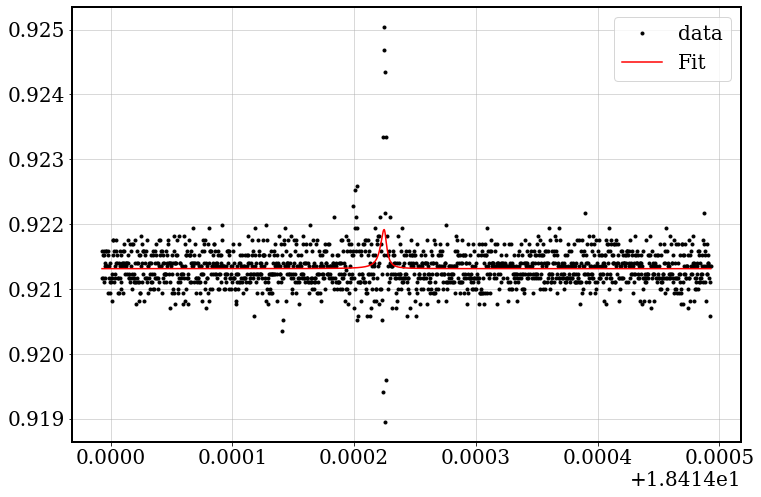

In [89]:
from process import utils
utils.fit_resonance(reso['freq']*1e-6, reso['power'],verbose=True)


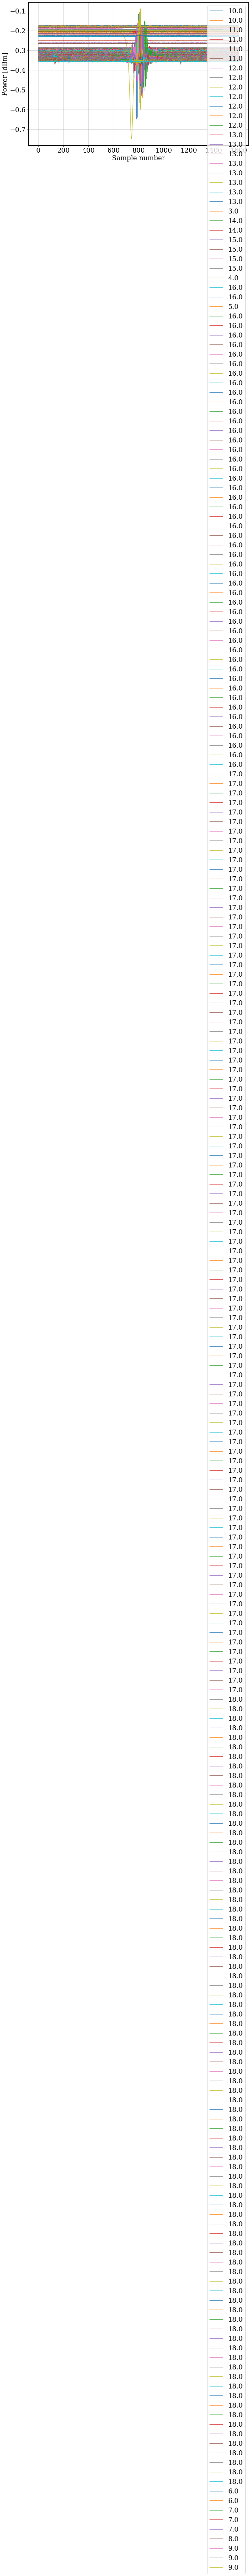

In [90]:
from process import utils

# plot all the resonance with a Q greater than 1e7
Q = reader.get_parameters('Q')
loc = np.where(Q>3e6)[0]

for l in loc:
    power = reader.get_resonance(loc=l)['power']
    freq = reader.get_resonance(loc=l)['freq']
    f0 = reader.get_resonance(loc=l)['f0']
    
    #utils.fit_resonance(freq*1e-6, power,verbose=True)
    
    plt.plot(power,label=str(np.round(f0)))
    
plt.legend()
plt.xlabel('Sample number')
plt.ylabel('Power [dBm]')
plt.grid(alpha=0.6)
plt.show()

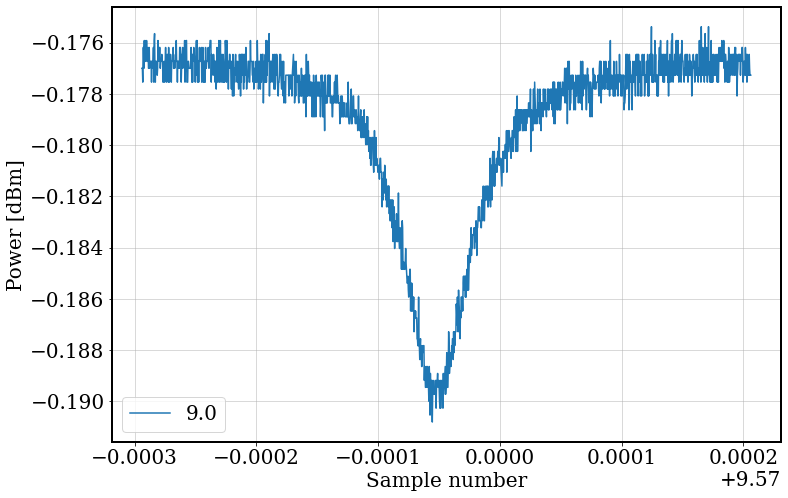

conversion is: dBm-W
[4.79800597e-04 1.56250000e-06 9.56994444e+00 6.00148742e-02
 3.85262860e-01 1.00000000e+00] 
 [[-1.00000000e-03  5.00000000e-07  9.56970600e+00  6.00148742e-03
   3.85262860e-02  0.00000000e+00]
 [ 1.00000000e-03  5.00000000e-02  9.57020600e+00  6.00148742e-01
   3.85262860e+00  1.00000000e+02]]
Parametro  1 :  3.0503880546062164e-07  +/-  2.074460402021633e-09
Parametro  2 :  3.369428600672718e-05  +/-  2.5723960363385994e-07
Parametro  3 :  9.569946753622764  +/-  2.9422392087646303e-07
Parametro  4 :  0.006001492799810103  +/-  0.023260524474295646
Parametro  5 :  0.9027282284387919  +/-  0.22260226055679636
Parametro  6 :  0.8876933458360196  +/-  0.016912975853353284
Q = 1.42e+05  +/-  0.004366080361802506


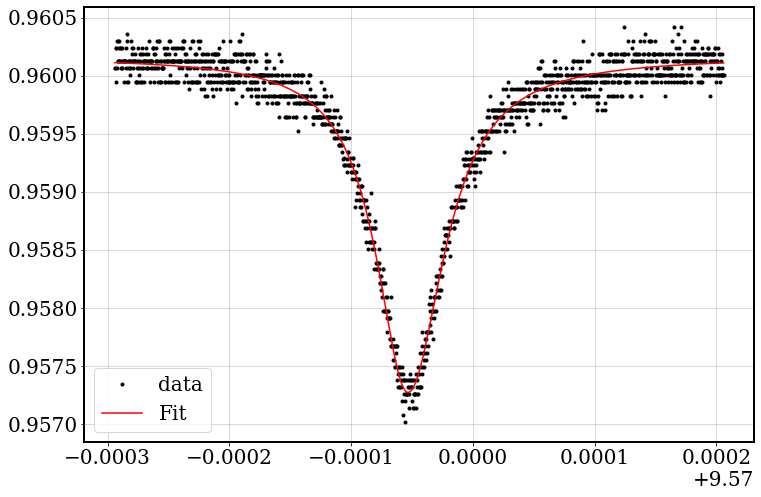

In [91]:
reso = reader.get_resonance(loc=38)

plt.plot(reso['freq']*1e-6, reso['power'],label=str(np.round(f0)))

plt.legend()
plt.xlabel('Sample number')
plt.ylabel('Power [dBm]')
plt.grid(alpha=0.6)
plt.show()

utils.fit_resonance(reso['freq']*1e-6, reso['power'],verbose=True, conversion=None)



2
conversion is: dBm-W
[ 9.75268702e-05  1.56250000e-06  9.28377394e+00 -4.84829984e+01
  4.51039642e+02  1.00000000e+00] 
 [[-1.00000000e-03  1.04375000e-07  9.28372144e+00 -4.84829984e+02
   4.51039642e+01  0.00000000e+00]
 [ 1.00000000e-03  1.04375000e-02  9.28382581e+00 -4.84829984e+00
   4.51039642e+03  1.00000000e+02]]
Parametro  1 :  2.7839489365975875e-06  +/-  1.1461438448443047e-08
Parametro  2 :  2.42745049252501e-06  +/-  1.2428236184345881e-08
Parametro  3 :  9.283774022482001  +/-  1.5561868766839072e-08
Parametro  4 :  -60.92402128307649  +/-  5.595699951236422
Parametro  5 :  566.5653465470125  +/-  51.94921286584255
Parametro  6 :  1.223117507210526  +/-  0.01596814884469371
Q = 1.91e+06  +/-  0.0032053936454646513


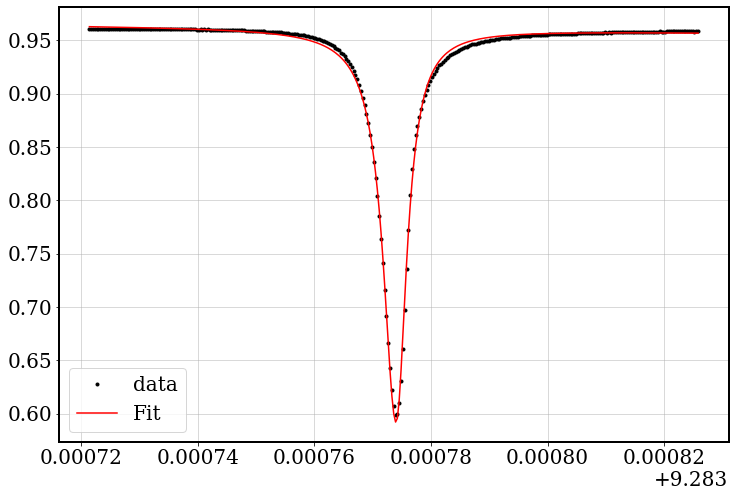

4
conversion is: dBm-W
[ 9.21910820e-05  1.56250000e-06  9.29800913e+00 -3.39809825e+01
  3.16898053e+02  1.00000000e+00] 
 [[-1.00000000e-03  9.78125000e-08  9.29795975e+00 -3.39809825e+02
   3.16898053e+01  0.00000000e+00]
 [ 1.00000000e-03  9.78125000e-03  9.29805756e+00 -3.39809825e+00
   3.16898053e+03  1.00000000e+02]]


Parametro  1 :  1.7777731608608281e-06  +/-  8.78067849664192e-09
Parametro  2 :  2.2476533912903177e-06  +/-  1.3295711216499134e-08
Parametro  3 :  9.298009126978751  +/-  1.6650509021705087e-08
Parametro  4 :  -45.92203187610622  +/-  4.759313164240033
Parametro  5 :  427.9439241490779  +/-  44.25213635652178
Parametro  6 :  1.3026061880405335  +/-  0.01978466517662606
Q = 2.07e+06  +/-  0.003703976130444825


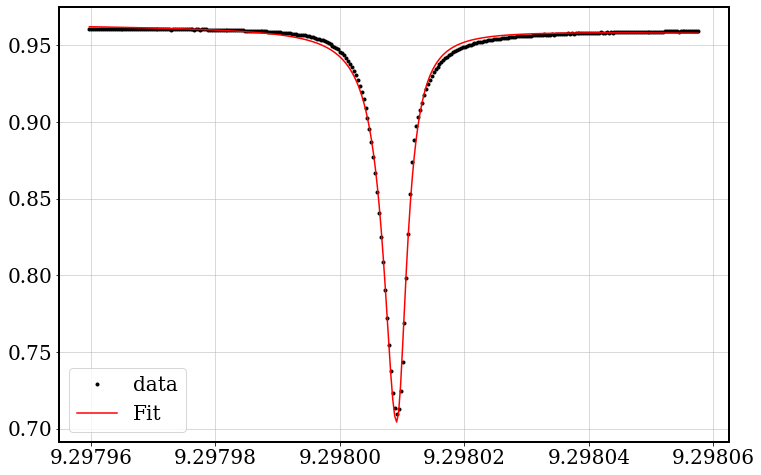

5
conversion is: dBm-W
[ 8.07242347e-05  1.56250000e-06  9.34332394e+00 -1.27530010e+01
  1.20108640e+02  1.00000000e+00] 
 [[-1.00000000e-03  8.46875000e-08  9.34328112e+00 -1.27530010e+02
   1.20108640e+01  0.00000000e+00]
 [ 1.00000000e-03  8.46875000e-03  9.34336581e+00 -1.27530010e+00
   1.20108640e+03  1.00000000e+02]]
Parametro  1 :  6.028836614328352e-07  +/-  4.740918732167809e-09
Parametro  2 :  1.9190096443177737e-06  +/-  1.590671917234777e-08
Parametro  3 :  9.34332399650165  +/-  1.986063558839599e-08
Parametro  4 :  -23.033130800421162  +/-  3.114240726082322
Parametro  5 :  216.1664201043823  +/-  29.097359883777266
Parametro  6 :  1.5346427898010155  +/-  0.033449384444932964
Q = 2.43e+06  +/-  0.005174709686114398


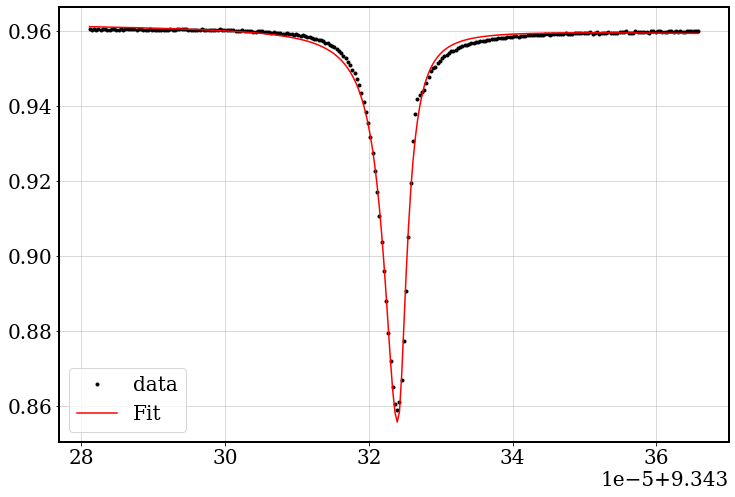

6
conversion is: dBm-W
[ 9.27930744e-05  1.56250000e-06  9.35604262e+00 -2.07396769e+01
  1.94990011e+02  1.00000000e+00] 
 [[-1.00000000e-03  9.78125000e-08  9.35599325e+00 -2.07396769e+02
   1.94990011e+01  0.00000000e+00]
 [ 1.00000000e-03  9.78125000e-03  9.35609106e+00 -2.07396769e+00
   1.94990011e+03  1.00000000e+02]]
Parametro  1 :  1.1619808987175193e-06  +/-  5.446848015971411e-09
Parametro  2 :  2.2822238981937592e-06  +/-  1.283185382424846e-08
Parametro  3 :  9.35604257288964  +/-  1.6062195119755293e-08
Parametro  4 :  -29.2827930154919  +/-  2.9322015353182076
Parametro  5 :  274.93144798177184  +/-  27.433802061948782
Parametro  6 :  1.2979287292898332  +/-  0.018725080956763642
Q = 2.05e+06  +/-  0.0035189788198405608


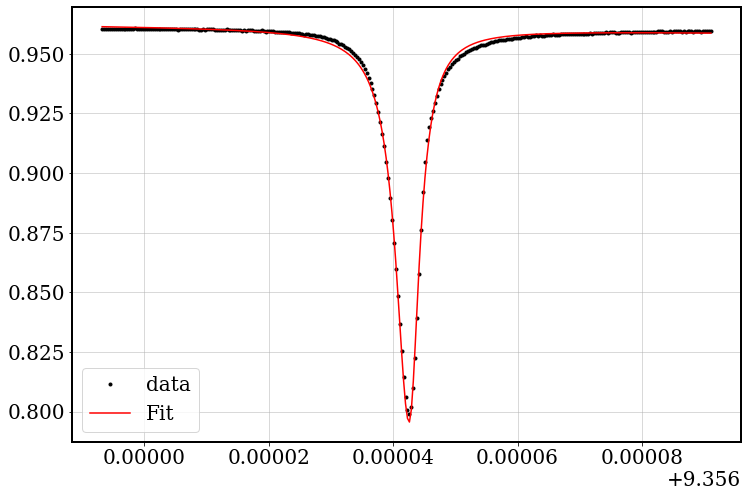

9
conversion is: dBm-W
[ 8.61033313e-05  1.56250000e-06  9.37419800e+00 -3.56310612e+01
  3.34956256e+02  1.00000000e+00] 
 [[-1.00000000e-03  9.12500000e-08  9.37415175e+00 -3.56310612e+02
   3.34956256e+01  0.00000000e+00]
 [ 1.00000000e-03  9.12500000e-03  9.37424300e+00 -3.56310612e+00
   3.34956256e+03  1.00000000e+02]]
Parametro  1 :  1.5355163314577137e-06  +/-  8.938920770077952e-09
Parametro  2 :  2.1224776626778344e-06  +/-  1.4388623577799913e-08
Parametro  3 :  9.374197884296112  +/-  1.8021802090374015e-08
Parametro  4 :  -49.409324456476355  +/-  5.4008880530876935
Parametro  5 :  464.1330582086993  +/-  50.62899231969849
Parametro  6 :  1.354035345342156  +/-  0.02369163396867007
Q = 2.21e+06  +/-  0.004245463310939399


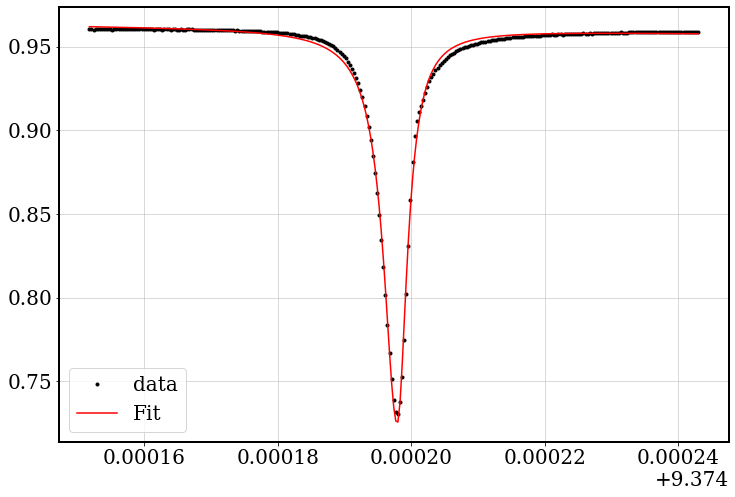

10
conversion is: dBm-W
[ 8.70663635e-05  1.56250000e-06  9.40380594e+00 -1.19450226e+01
  1.13282838e+02  1.00000000e+00] 
 [[-1.00000000e-03  9.12500000e-08  9.40375969e+00 -1.19450226e+02
   1.13282838e+01  0.00000000e+00]
 [ 1.00000000e-03  9.12500000e-03  9.40385094e+00 -1.19450226e+00
   1.13282838e+03  1.00000000e+02]]
Parametro  1 :  5.642803729230647e-07  +/-  3.6210741632225134e-09
Parametro  2 :  2.0245162513240596e-06  +/-  1.4516281144061866e-08
Parametro  3 :  9.403805873863439  +/-  1.8204103158108714e-08
Parametro  4 :  -17.26497041544815  +/-  2.1709817531656874
Parametro  5 :  163.31677092312228  +/-  20.41549052146371
Parametro  6 :  1.4324186371932304  +/-  0.026757978965865594
Q = 2.32e+06  +/-  0.004495914306986487


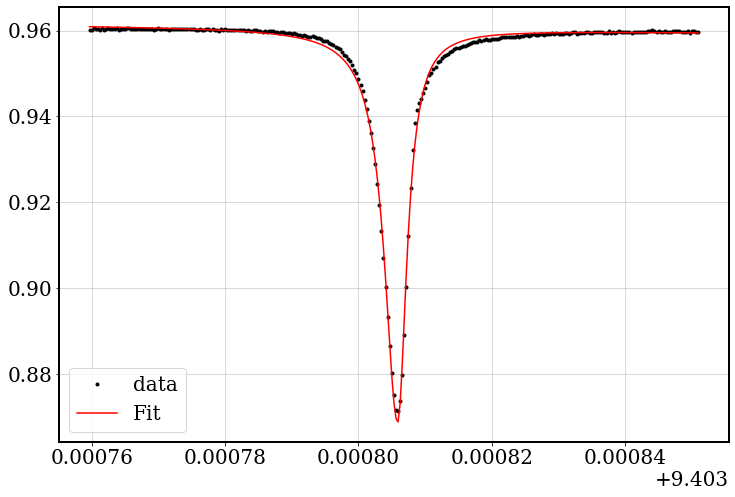

15
conversion is: dBm-W
[ 9.90931400e-05  1.56250000e-06  9.42818825e+00 -1.91832165e+01
  1.81812387e+02  1.00000000e+00] 
 [[-1.00000000e-03  1.04375000e-07  9.42813544e+00 -1.91832165e+02
   1.81812387e+01  0.00000000e+00]
 [ 1.00000000e-03  1.04375000e-02  9.42823981e+00 -1.91832165e+00
   1.81812387e+03  1.00000000e+02]]
Parametro  1 :  1.1608464453274752e-06  +/-  4.865139722593219e-09
Parametro  2 :  2.389671381634786e-06  +/-  1.2349556392056804e-08
Parametro  3 :  9.428188123509335  +/-  1.548526133472623e-08
Parametro  4 :  -23.900788728470896  +/-  2.378417410400259
Parametro  5 :  226.30143465644795  +/-  22.424166104461
Parametro  6 :  1.2433597937588041  +/-  0.016426789700496703
Q = 1.97e+06  +/-  0.0032400399179850835


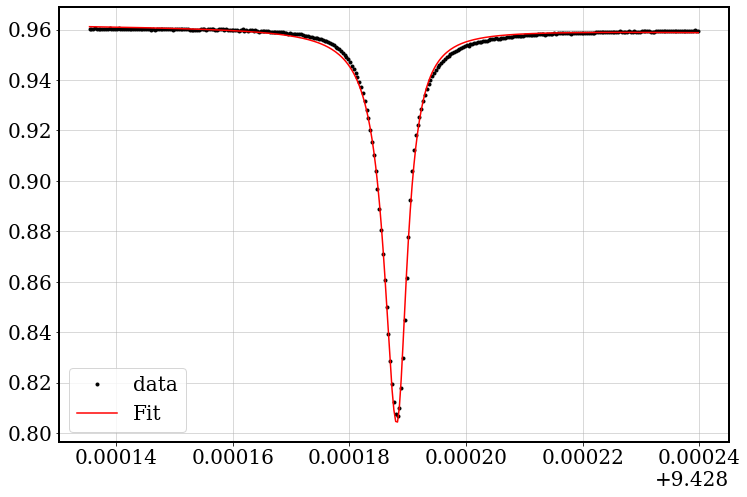

16
conversion is: dBm-W
[ 8.75040200e-05  1.56250000e-06  9.44035531e+00 -2.91092355e+00
  2.84391080e+01  1.00000000e+00] 
 [[-1.00000000e-03  9.12500000e-08  9.44030938e+00 -2.91092355e+01
   2.84391080e+00  0.00000000e+00]
 [ 1.00000000e-03  9.12500000e-03  9.44040062e+00 -2.91092355e-01
   2.84391080e+02  1.00000000e+02]]
Parametro  1 :  1.1590505903175155e-07  +/-  9.731890442712502e-10
Parametro  2 :  1.972286291516879e-06  +/-  1.7965526303559083e-08
Parametro  3 :  9.440355633047943  +/-  2.251593244724857e-08
Parametro  4 :  -4.209374376195348  +/-  0.5779694762833693
Parametro  5 :  40.6982236922059  +/-  5.456237253823572
Parametro  6 :  1.4862832667631247  +/-  0.03548106660591236
Q = 2.39e+06  +/-  0.005708079132348467


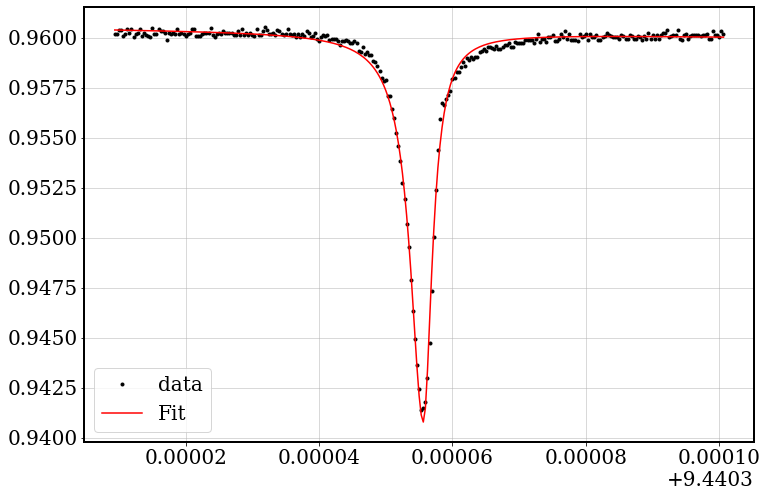

18
conversion is: dBm-W
[ 9.36511990e-05  1.56250000e-06  9.45684800e+00 -4.95160450e+00
  4.77840343e+01  1.00000000e+00] 
 [[-1.00000000e-03  9.78125000e-08  9.45679862e+00 -4.95160450e+01
   4.77840343e+00  0.00000000e+00]
 [ 1.00000000e-03  9.78125000e-03  9.45689644e+00 -4.95160450e-01
   4.77840343e+02  1.00000000e+02]]
Parametro  1 :  2.7860990997835605e-07  +/-  1.4885240729112939e-09
Parametro  2 :  2.1922511718827957e-06  +/-  1.3750657040453041e-08
Parametro  3 :  9.45684806247135  +/-  1.724011269569783e-08
Parametro  4 :  -6.991688889056046  +/-  0.8043972864119194
Parametro  5 :  67.079618720828  +/-  7.607062739324656
Parametro  6 :  1.3427779432444567  +/-  0.021726985742238008
Q = 2.16e+06  +/-  0.003932056900417028


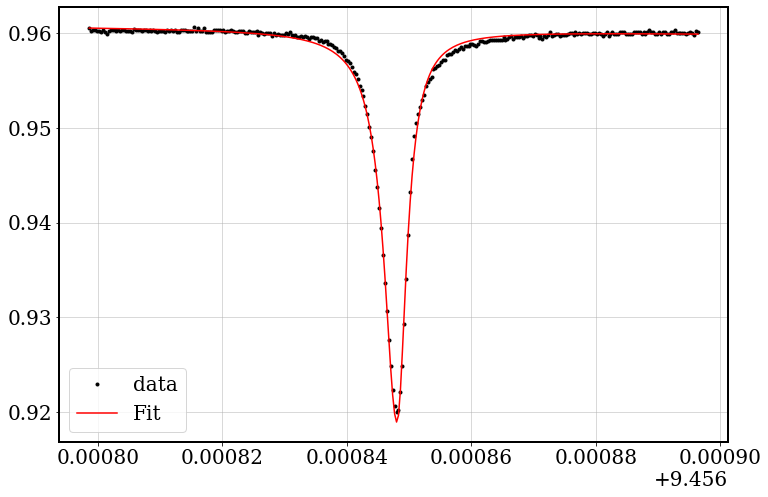

21
conversion is: dBm-W
[ 9.31748441e-05  1.56250000e-06  9.46551131e+00 -1.50291216e+01
  1.43210922e+02  1.00000000e+00] 
 [[-1.00000000e-03  9.78125000e-08  9.46546194e+00 -1.50291216e+02
   1.43210922e+01  0.00000000e+00]
 [ 1.00000000e-03  9.78125000e-03  9.46555975e+00 -1.50291216e+00
   1.43210922e+03  1.00000000e+02]]
Parametro  1 :  7.490144525397568e-07  +/-  3.4093915711248843e-09
Parametro  2 :  2.318944735493275e-06  +/-  1.2882776929129275e-08
Parametro  3 :  9.46551142596176  +/-  1.6119745308170706e-08
Parametro  4 :  -18.1078601769082  +/-  1.845264373192616
Parametro  5 :  172.36025692476667  +/-  17.466370314663678
Parametro  6 :  1.2604192174549715  +/-  0.017902375668830975
Q = 2.04e+06  +/-  0.003475663965045312


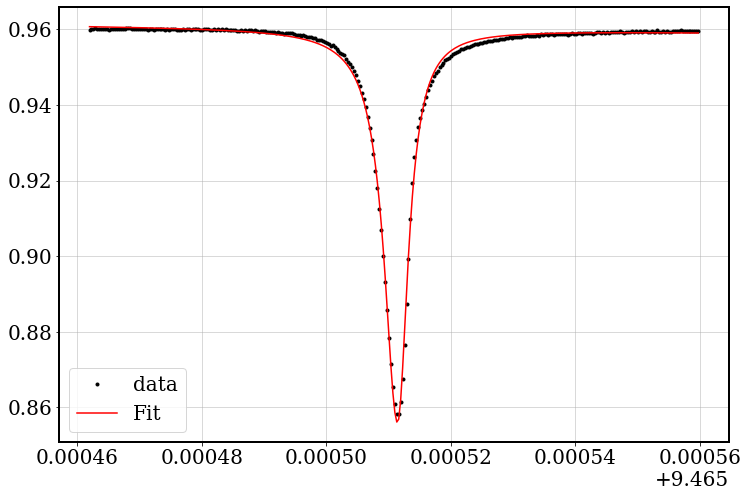

96
conversion is: dBm-W
[ 9.97982272e-05  1.56250000e-06  1.14320707e+01 -2.61660390e+00
  3.08693542e+01  1.00000000e+00] 
 [[-1.00000000e-03  1.04375000e-07  1.14320182e+01 -2.61660390e+01
   3.08693542e+00  0.00000000e+00]
 [ 1.00000000e-03  1.04375000e-02  1.14321226e+01 -2.61660390e-01
   3.08693542e+02  1.00000000e+02]]
Parametro  1 :  1.410523817862619e-07  +/-  6.742584513863245e-10
Parametro  2 :  2.4216178295845535e-06  +/-  1.4411256580674275e-08
Parametro  3 :  11.432070814544721  +/-  1.809154534836862e-08
Parametro  4 :  -3.2411239652875423  +/-  0.32936712856288064
Parametro  5 :  38.01023180595024  +/-  3.7653482787851247
Parametro  6 :  1.219100721408086  +/-  0.018526181547466068
Q = 2.36e+06  +/-  0.0037354253688065666


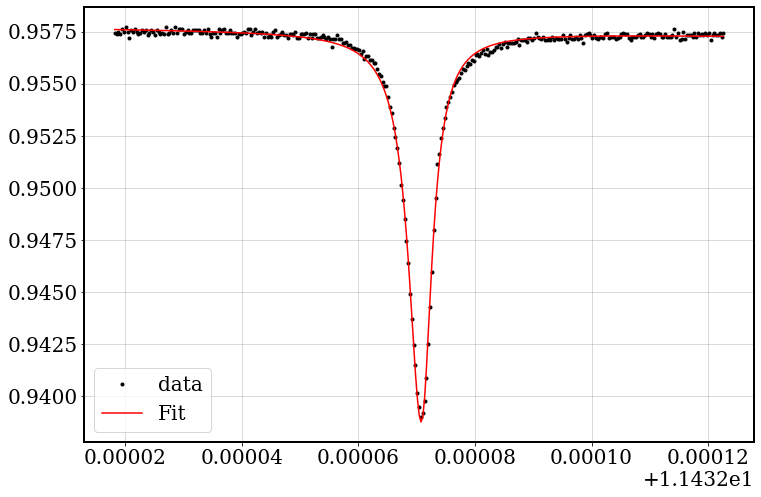

118
conversion is: dBm-W
[ 2.10778225e-04  1.56250000e-06  1.19046005e+01 -8.59324323e+00
  1.03246454e+02  1.00000000e+00] 
 [[-1.00000000e-03  2.22500000e-07  1.19044889e+01 -8.59324323e+01
   1.03246454e+01  0.00000000e+00]
 [ 1.00000000e-03  2.22500000e-02  1.19047114e+01 -8.59324323e-01
   1.03246454e+03  1.00000000e+02]]
Parametro  1 :  1.9046145485487113e-06  +/-  2.7819703970426947e-09
Parametro  2 :  5.337305847786786e-06  +/-  1.0137843457030617e-08
Parametro  3 :  11.904600185465199  +/-  1.261505298572283e-08
Parametro  4 :  -6.813330707891049  +/-  0.3074507122536239
Parametro  5 :  82.06561430989949  +/-  3.660077630623307
Parametro  6 :  0.9049792713622801  +/-  0.004330487833293132
Q = 1.12e+06  +/-  0.0011817809720380478


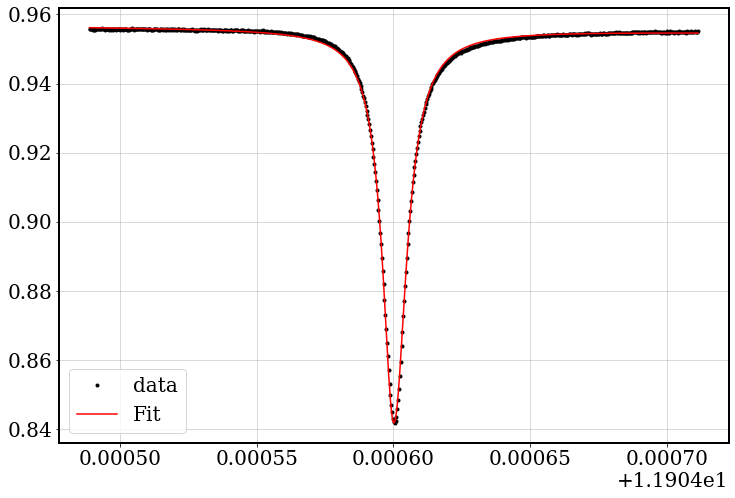

297
conversion is: dBm-W
[ 1.16860290e-05  1.56250000e-06  1.61491029e+01 -8.70178767e+00
  1.41460923e+02  1.00000000e+00] 
 [[-1.00000000e-03  1.25000000e-08  1.61490966e+01 -8.70178767e+01
   1.41460923e+01  0.00000000e+00]
 [ 1.00000000e-03  1.25000000e-03  1.61491091e+01 -8.70178767e-01
   1.41460923e+03  1.00000000e+02]]
Parametro  1 :  8.112632819533282e-08  +/-  6.358835726186706e-06
Parametro  2 :  2.6086678465243568e-05  +/-  0.0024098433569848614
Parametro  3 :  16.149103188037095  +/-  5.642499453234875e-05
Parametro  4 :  -8.701730145025715  +/-  1084.6934065406258
Parametro  5 :  141.46158347635492  +/-  17516.77951960158
Parametro  6 :  0.21108077355616295  +/-  19.58751219805578
Q = 3.10e+05  +/-  1.0814905918706357


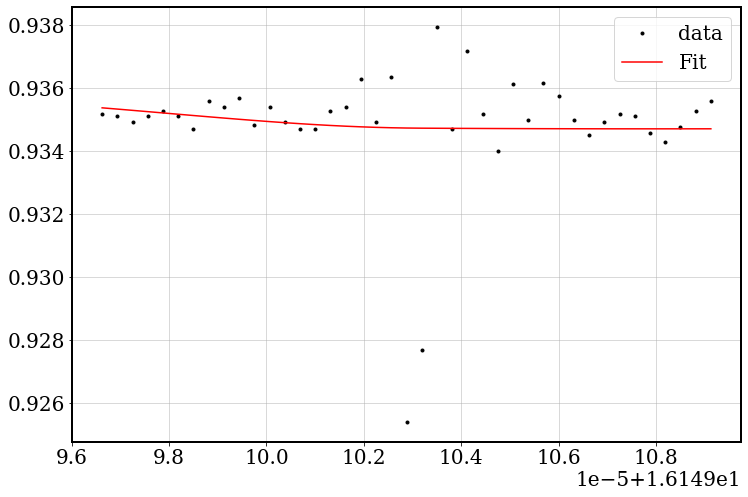

315
conversion is: dBm-W
[ 2.48025544e-05  1.56250000e-06  1.62544632e+01 -5.26540634e+00
  8.65201003e+01  1.00000000e+00] 
 [[-1.00000000e-03  2.65625000e-08  1.62544491e+01 -5.26540634e+01
   8.65201003e+00  0.00000000e+00]
 [ 1.00000000e-03  2.65625000e-03  1.62544757e+01 -5.26540634e-01
   8.65201003e+02  1.00000000e+02]]
Parametro  1 :  2.4337181401603383e-08  +/-  7.452196549037906e-09
Parametro  2 :  7.087436567246482e-07  +/-  3.141692620462138e-07
Parametro  3 :  16.254463124466007  +/-  3.9310237679618676e-07
Parametro  4 :  -5.265357890115437  +/-  53.320869884125905
Parametro  5 :  86.52017827679826  +/-  866.7020518216674
Parametro  6 :  0.9779136328891712  +/-  1.044413766637151
Q = 1.15e+07  +/-  0.277323382767791


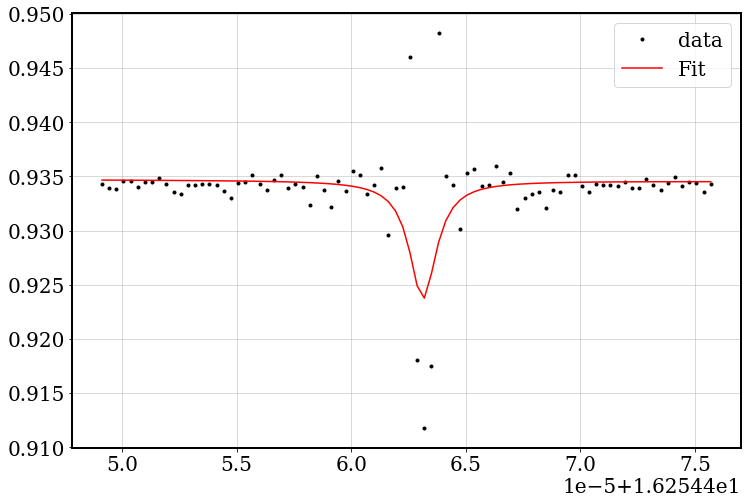

354
conversion is: dBm-W
[ 1.16512975e-05  1.56250000e-06  1.65477636e+01 -2.11146174e+01
  3.50331849e+02  1.00000000e+00] 
 [[-1.00000000e-03  1.25000000e-08  1.65477571e+01 -2.11146174e+02
   3.50331849e+01  0.00000000e+00]
 [ 1.00000000e-03  1.25000000e-03  1.65477696e+01 -2.11146174e+00
   3.50331849e+03  1.00000000e+02]]
Parametro  1 :  8.170300302519535e-09  +/-  2.594373315625057e-09
Parametro  2 :  3.7448179549951164e-07  +/-  2.401438088734134e-07
Parametro  3 :  16.54776335365125  +/-  2.7782983357561635e-07
Parametro  4 :  -21.11458849245124  +/-  71.43552302967989
Parametro  5 :  350.33198555757303  +/-  1182.0981015378886
Parametro  6 :  0.9640876324947983  +/-  1.2152662481110763
Q = 2.21e+07  +/-  0.3709523892944199


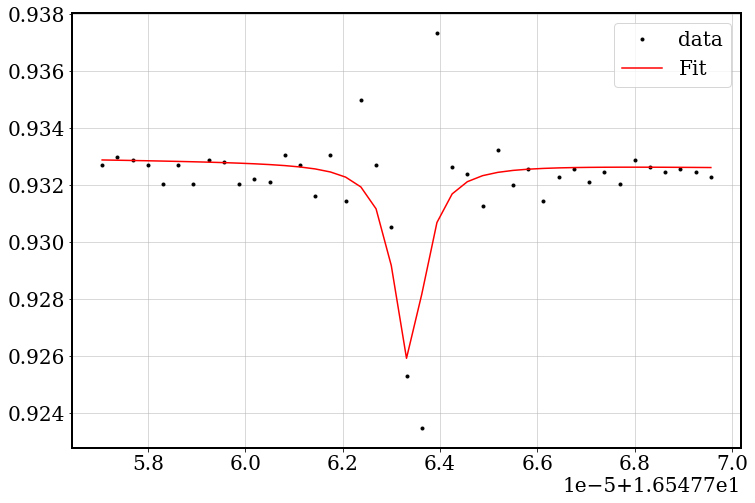

361
conversion is: dBm-W
[ 2.41500932e-05  1.56250000e-06  1.65622658e+01 -1.33721997e+01
  2.22405035e+02  1.00000000e+00] 
 [[-1.00000000e-03  2.59375000e-08  1.65622530e+01 -1.33721997e+02
   2.22405035e+01  0.00000000e+00]
 [ 1.00000000e-03  2.59375000e-03  1.65622789e+01 -1.33721997e+00
   2.22405035e+03  1.00000000e+02]]
Parametro  1 :  7.467990178049923e-08  +/-  1.6873869494183702e-08
Parametro  2 :  2.921264700697084e-07  +/-  1.3018292232013955e-07
Parametro  3 :  16.56226585178141  +/-  1.6809988093338588e-07
Parametro  4 :  -13.372246342373934  +/-  144.2531504280416
Parametro  5 :  222.40863255306002  +/-  2389.159020594238
Parametro  6 :  1.1735138327616041  +/-  1.0730767526429528
Q = 2.83e+07  +/-  0.2877176465612193


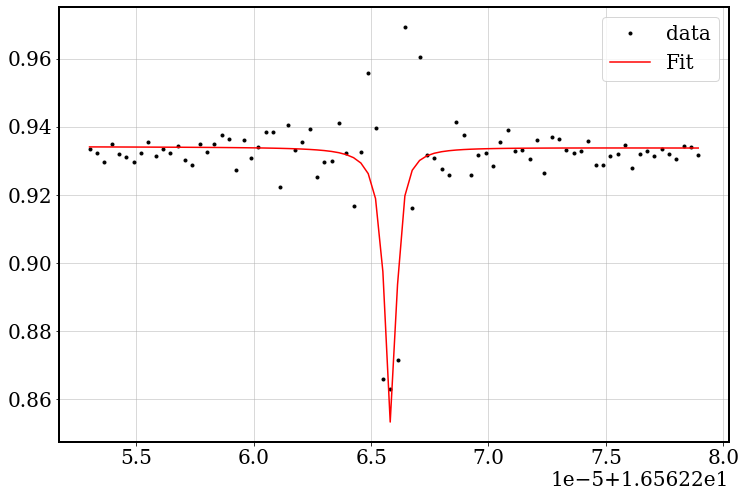

374
conversion is: dBm-W
[ 7.82816541e-05  1.56250001e-06  1.66872664e+01 -4.29052151e-01
  8.09093999e+00  1.00000000e+00] 
 [[-1.00000000e-03  8.40625000e-08  1.66872236e+01 -4.29052151e+00
   8.09093999e-01  0.00000000e+00]
 [ 1.00000000e-03  8.40625000e-03  1.66873076e+01 -4.29052151e-02
   8.09093999e+01  1.00000000e+02]]
Parametro  1 :  3.250775252655856e-08  +/-  4.271218872991998e-08
Parametro  2 :  1.6744129102862972e-06  +/-  1.1368676280780337e-06
Parametro  3 :  16.687266847924736  +/-  1.4636460947387643e-06
Parametro  4 :  -0.42903635584496924  +/-  18.70156838966208
Parametro  5 :  8.09116690932938  +/-  312.0780544720126
Parametro  6 :  3.0577030763087234  +/-  7.104177429729881
Q = 4.98e+06  +/-  0.43706247298598205


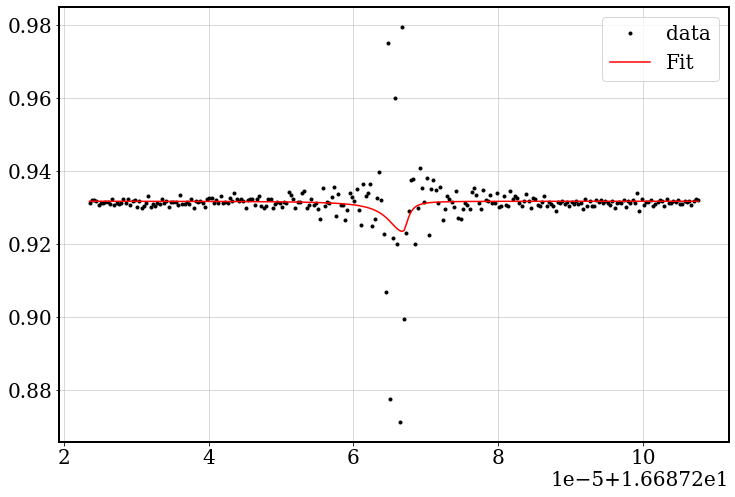

393
conversion is: dBm-W
[ 1.16088709e-05  1.56250001e-06  1.68343309e+01  4.91339289e+01
 -8.26208158e+02  1.00000000e+00] 
 [[-1.00000000e-03  1.25000000e-08  1.68343244e+01  4.91339289e+00
  -8.26208158e+03  0.00000000e+00]
 [ 1.00000000e-03  1.25000000e-03  1.68343369e+01  4.91339289e+02
  -8.26208158e+01  1.00000000e+02]]
Parametro  1 :  3.069859010125707e-08  +/-  1.4677433609786512e-08
Parametro  2 :  2.68040575933152e-07  +/-  1.5856302694931938e-07
Parametro  3 :  16.834330892775863  +/-  2.2502088156368542e-07
Parametro  4 :  49.13396772418179  +/-  239.9199875888543
Parametro  5 :  -826.2063837388894  +/-  4038.8923235401735
Parametro  6 :  1.4572371746849795  +/-  2.105935810935623
Q = 3.14e+07  +/-  0.41975152601486077


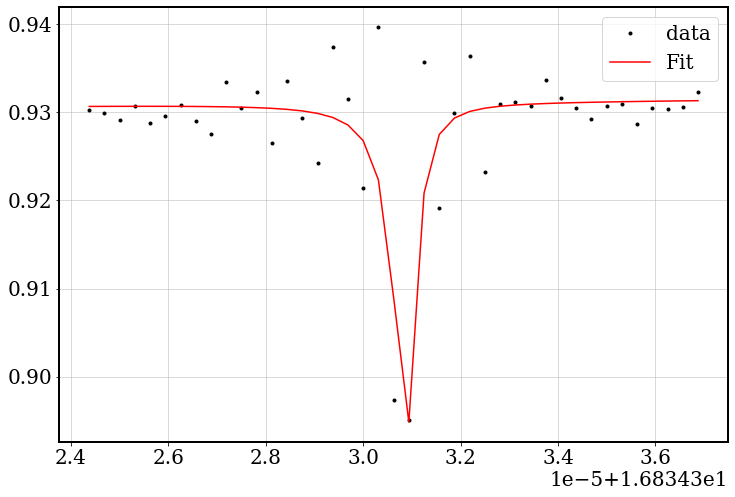

407
conversion is: dBm-W
[ 5.51844123e-06  1.56250001e-06  1.69274329e+01 -1.91811201e+01
  3.25616562e+02  1.00000000e+00] 
 [[-1.00000000e-03  5.93750000e-09  1.69274298e+01 -1.91811201e+02
   3.25616562e+01  0.00000000e+00]
 [ 1.00000000e-03  5.93750000e-04  1.69274358e+01 -1.91811201e+00
   3.25616562e+03  1.00000000e+02]]
Parametro  1 :  3.593100324500673e-09  +/-  3.5686207210743152e-09
Parametro  2 :  2.2940289104237847e-07  +/-  3.991156259538561e-07
Parametro  3 :  16.927432905185302  +/-  5.048545723187606e-07
Parametro  4 :  -19.18146104105865  +/-  208.96318961535314
Parametro  5 :  325.62288295776807  +/-  3537.21024890289
Parametro  6 :  1.1671100271841781  +/-  4.049029807157671
Q = 3.69e+07  +/-  1.1003666301343538


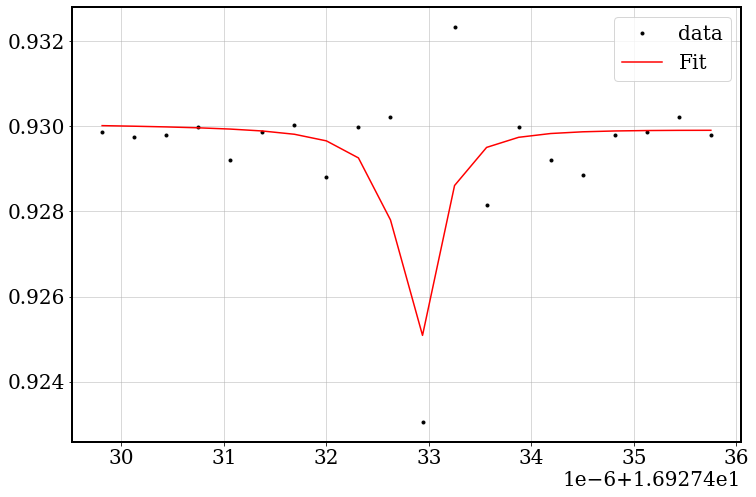

436
conversion is: dBm-W
[ 1.16056186e-05  1.56250000e-06  1.71057804e+01  1.78193261e+01
 -3.03885035e+02  1.00000000e+00] 
 [[-1.00000000e-03  1.25000000e-08  1.71057738e+01  1.78193261e+00
  -3.03885035e+03  0.00000000e+00]
 [ 1.00000000e-03  1.25000000e-03  1.71057863e+01  1.78193261e+02
  -3.03885035e+01  1.00000000e+02]]
Parametro  1 :  9.616616771600393e-09  +/-  1.306567988248665e-08
Parametro  2 :  2.2439945774416385e-06  +/-  2.5411756911494576e-06
Parametro  3 :  17.105779690580825  +/-  2.2587024537447257e-06
Parametro  4 :  17.8193480823976  +/-  111.3756566481542
Parametro  5 :  -303.8848192741884  +/-  1905.1675676900052
Parametro  6 :  0.9847689073341954  +/-  2.9629244834330346
Q = 3.81e+06  +/-  0.5032771639581857


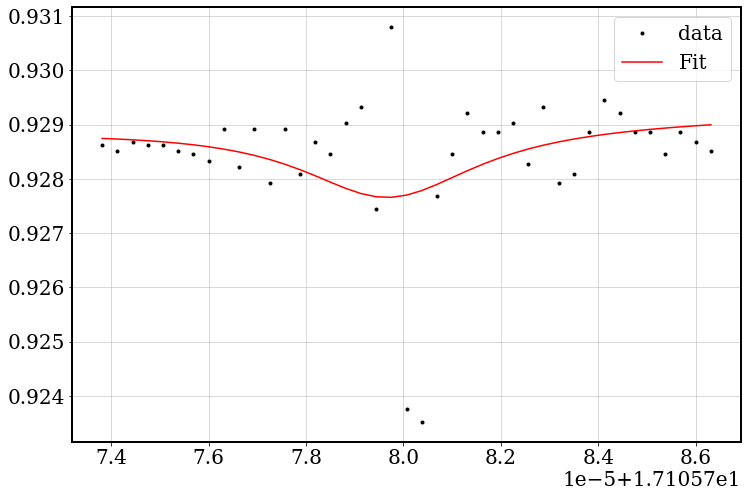

453
conversion is: dBm-W
[ 1.76548872e-05  1.56250000e-06  1.72362759e+01 -5.34789942e+01
  9.22704884e+02  1.00000000e+00] 
 [[-1.00000000e-03  1.90625000e-08  1.72362666e+01 -5.34789942e+02
   9.22704884e+01  0.00000000e+00]
 [ 1.00000000e-03  1.90625000e-03  1.72362856e+01 -5.34789942e+00
   9.22704884e+03  1.00000000e+02]]
Parametro  1 :  1.7135261010141653e-07  +/-  8.257059618987536e-07
Parametro  2 :  7.580672840565615e-06  +/-  2.2508480778892174e-05
Parametro  3 :  17.236275942101233  +/-  6.5683056730161385e-06
Parametro  4 :  -53.478730105941246  +/-  1403.868034386075
Parametro  5 :  922.7055193930634  +/-  24197.44737466344
Parametro  6 :  0.7167393385097782  +/-  4.737699009873394
Q = 1.14e+06  +/-  0.4332270902046684


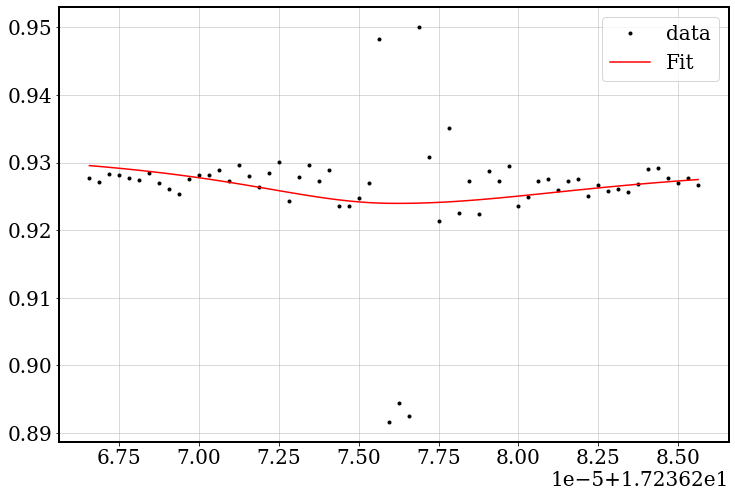

473
conversion is: dBm-W
[ 1.15718654e-05  1.56250000e-06  1.74115282e+01 -9.76005725e+00
  1.70863252e+02  1.00000000e+00] 
 [[-1.00000000e-03  1.25000000e-08  1.74115216e+01 -9.76005725e+01
   1.70863252e+01  0.00000000e+00]
 [ 1.00000000e-03  1.25000000e-03  1.74115341e+01 -9.76005725e-01
   1.70863252e+03  1.00000000e+02]]
Parametro  1 :  6.895428513709381e-09  +/-  1.7319814059796815e-09
Parametro  2 :  2.0255478258134905e-07  +/-  1.4761804377338707e-07
Parametro  3 :  17.411528001452357  +/-  1.9914680681958655e-07
Parametro  4 :  -9.761822448722812  +/-  47.014199107709345
Parametro  5 :  170.89455090260998  +/-  818.5890139551564
Parametro  6 :  0.5251918009213845  +/-  0.5585450357181486
Q = 4.30e+07  +/-  0.4915875208713134


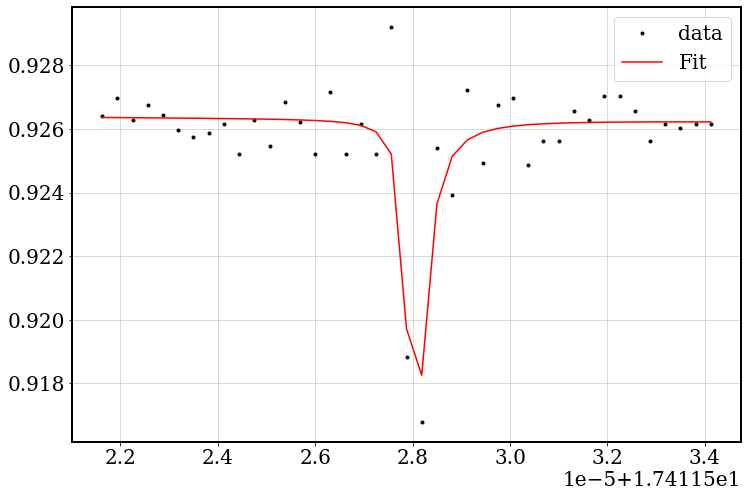

490
conversion is: dBm-W
[ 1.15518051e-05  1.56250000e-06  1.75548206e+01 -5.20892145e+01
  9.15341092e+02  1.00000000e+00] 
 [[-1.00000000e-03  1.25000000e-08  1.75548141e+01 -5.20892145e+02
   9.15341092e+01  0.00000000e+00]
 [ 1.00000000e-03  1.25000000e-03  1.75548266e+01 -5.20892145e+00
   9.15341092e+03  1.00000000e+02]]
Parametro  1 :  2.037795097004075e-08  +/-  1.6990720898420206e-08
Parametro  2 :  5.078908915954141e-07  +/-  3.591912547403771e-07
Parametro  3 :  17.55482069722976  +/-  5.4089810677717e-07
Parametro  4 :  -52.08906112963014  +/-  207.5916749923616
Parametro  5 :  915.340082303195  +/-  3644.234506515151
Parametro  6 :  1.8419791630520672  +/-  3.8491612463528777
Q = 1.73e+07  +/-  0.5324943956743071


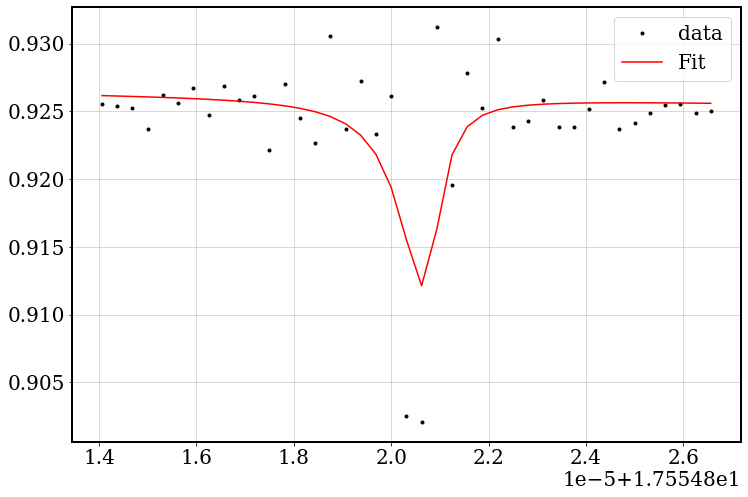

495
conversion is: dBm-W
[ 2.36514927e-05  1.56250000e-06  1.75997507e+01 -5.02303838e+01
  8.84965461e+02  1.00000000e+00] 
 [[-1.00000000e-03  2.56250000e-08  1.75997373e+01 -5.02303838e+02
   8.84965461e+01  0.00000000e+00]
 [ 1.00000000e-03  2.56250000e-03  1.75997629e+01 -5.02303838e+00
   8.84965461e+03  1.00000000e+02]]
Parametro  1 :  8.020471274448003e-08  +/-  3.259143134151603e-08
Parametro  2 :  1.0912828440726139e-06  +/-  5.773582892304855e-07
Parametro  3 :  17.599749803832356  +/-  6.66439528755161e-07
Parametro  4 :  -50.23024354537493  +/-  186.59285671684532
Parametro  5 :  884.9659436717166  +/-  3283.987582504737
Parametro  6 :  0.8316868670216715  +/-  1.031582336050005
Q = 8.06e+06  +/-  0.3053468366954448


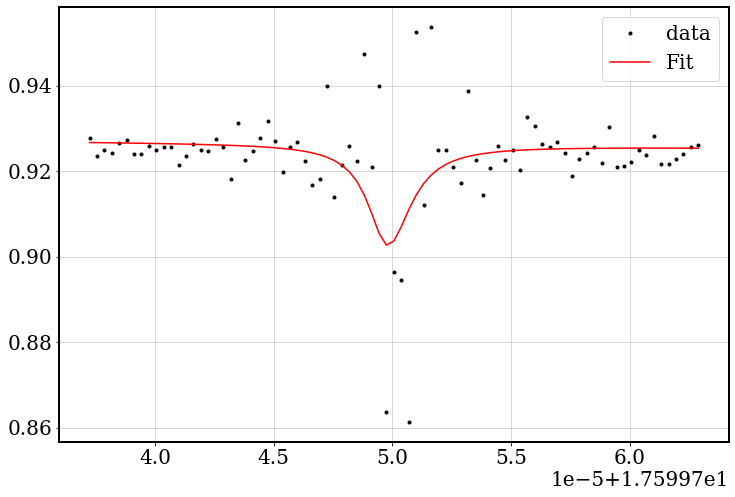

499
conversion is: dBm-W
[ 1.15595052e-05  1.56250000e-06  1.76197975e+01  5.71293247e+01
 -1.00568232e+03  1.00000000e+00] 
 [[-1.00000000e-03  1.25000000e-08  1.76197909e+01  5.71293247e+00
  -1.00568232e+04  0.00000000e+00]
 [ 1.00000000e-03  1.25000000e-03  1.76198034e+01  5.71293247e+02
  -1.00568232e+02  1.00000000e+02]]
Parametro  1 :  9.624003084201239e-09  +/-  3.149090385180017e-09
Parametro  2 :  2.2004970348205105e-07  +/-  1.5940347325976818e-07
Parametro  3 :  17.61979739974287  +/-  1.6205708092848446e-07
Parametro  4 :  57.12934183511781  +/-  64.73557559119509
Parametro  5 :  -1005.6818161139786  +/-  1140.6277160120458
Parametro  6 :  1.936292355669037  +/-  1.7462908588888515
Q = 4.00e+07  +/-  0.36822835560354006


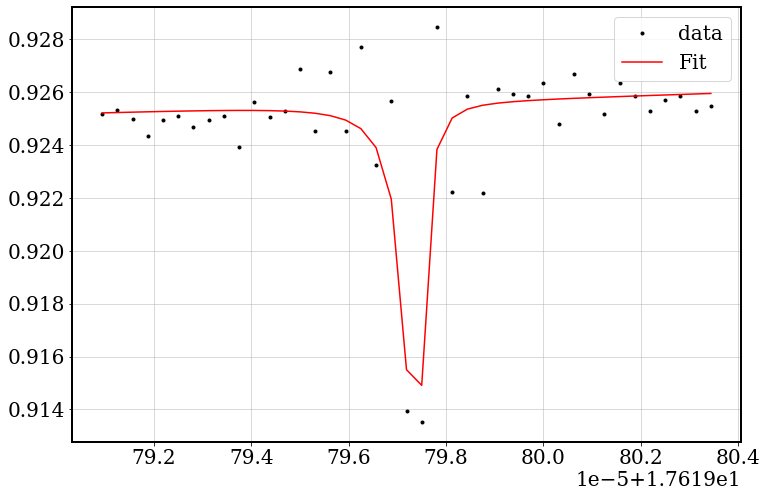

510
conversion is: dBm-W
[ 1.15623659e-05  1.56250000e-06  1.76614491e+01 -1.32173433e+01
  2.34362478e+02  1.00000000e+00] 
 [[-1.00000000e-03  1.25000000e-08  1.76614425e+01 -1.32173433e+02
   2.34362478e+01  0.00000000e+00]
 [ 1.00000000e-03  1.25000000e-03  1.76614550e+01 -1.32173433e+00
   2.34362478e+03  1.00000000e+02]]
Parametro  1 :  7.008044438163474e-08  +/-  3.2685348899233774e-07
Parametro  2 :  6.114306634190178e-06  +/-  1.705094327133948e-05
Parametro  3 :  17.661448317415207  +/-  3.1075759044370164e-06
Parametro  4 :  -13.21726435573374  +/-  993.912596472833
Parametro  5 :  234.36400016205164  +/-  17553.931203690892
Parametro  6 :  0.658837961070857  +/-  3.6755677222725978
Q = 1.44e+06  +/-  0.2541233283153955


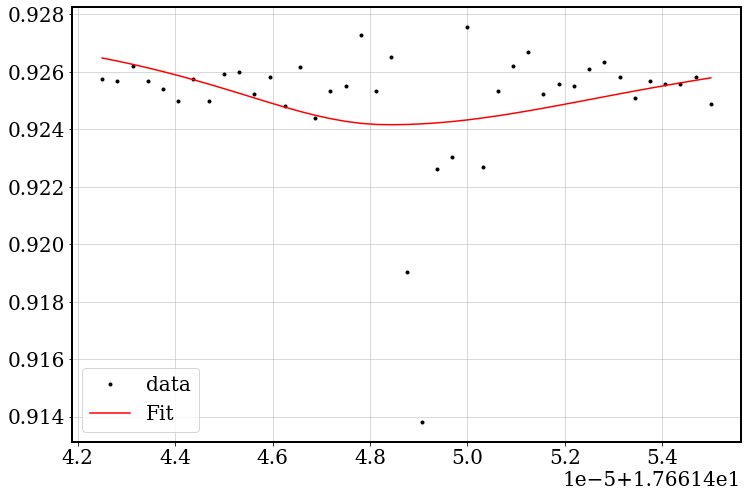

533
conversion is: dBm-W
[ 3.03371542e-05  1.56250000e-06  1.78042386e+01 -3.82419090e+00
  6.90113698e+01  1.00000000e+00] 
 [[-1.00000000e-03  3.28125000e-08  1.78042217e+01 -3.82419090e+01
   6.90113698e+00  0.00000000e+00]
 [ 1.00000000e-03  3.28125000e-03  1.78042546e+01 -3.82419090e-01
   6.90113698e+02  1.00000000e+02]]
Parametro  1 :  1.2941914159498403e-08  +/-  1.7981593892512772e-09
Parametro  2 :  3.3000829615716663e-07  +/-  1.0877278196854255e-07
Parametro  3 :  17.80423821701124  +/-  1.5377490620808073e-07
Parametro  4 :  -3.8242079909514572  +/-  14.863578605003399
Parametro  5 :  69.01206652516025  +/-  264.63469006935895
Parametro  6 :  0.7540557064653459  +/-  0.5382482101908053
Q = 2.70e+07  +/-  0.23298642488497526


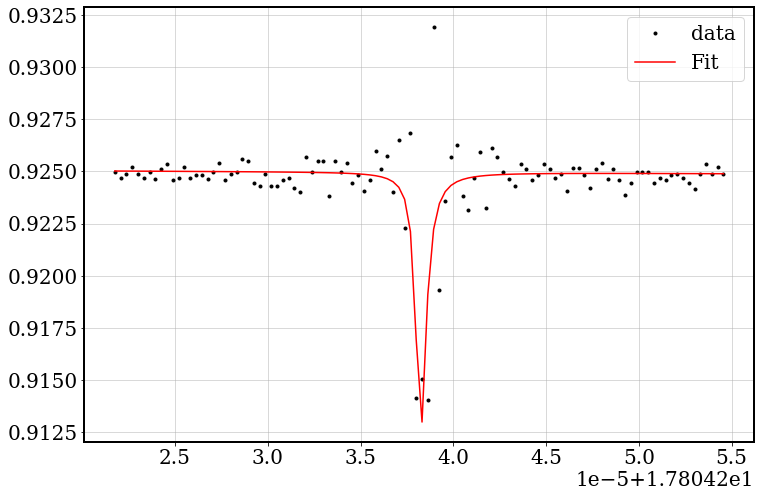

539
conversion is: dBm-W
[ 6.45699243e-05  1.56250000e-06  5.57411194e+00 -6.21744196e+01
  3.47469631e+02  1.00000000e+00] 
 [[-1.00000000e-03  7.15625000e-08  5.57407569e+00 -6.21744196e+02
   3.47469631e+01  0.00000000e+00]
 [ 1.00000000e-03  7.15625000e-03  5.57414725e+00 -6.21744196e+00
   3.47469631e+03  1.00000000e+02]]
Parametro  1 :  2.9786504750259327e-06  +/-  7.493510080179686e-08
Parametro  2 :  1.504688481926823e-06  +/-  2.6530653013941715e-08
Parametro  3 :  5.574112270389471  +/-  3.1113030196585645e-08
Parametro  4 :  -62.18672936586495  +/-  55.01794772016106
Parametro  5 :  347.5869237461528  +/-  306.67621453095944
Parametro  6 :  2.4363641984836715  +/-  0.1229276033056988
Q = 1.85e+06  +/-  0.010338694876146323


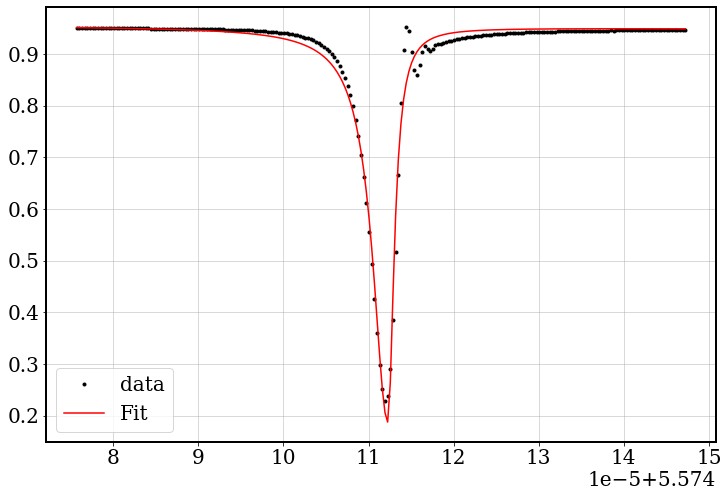

558
conversion is: dBm-W
[ 4.61627755e-04  1.56250001e-06  1.79997502e+01 -2.29021445e-01
  5.04559100e+00  1.00000000e+00] 
 [[-1.00000000e-03  5.00000000e-07  1.79994930e+01 -2.29021445e+00
   5.04559100e-01  0.00000000e+00]
 [ 1.00000000e-03  5.00000000e-02  1.79999930e+01 -2.29021445e-02
   5.04559100e+01  1.00000000e+02]]
Parametro  1 :  7.38725258528393e-08  +/-  2.2068626814944957e-08
Parametro  2 :  5.6264473089886e-06  +/-  2.003615528089446e-06
Parametro  3 :  17.999750166347674  +/-  2.51738777469686e-06
Parametro  4 :  -0.22959120807283348  +/-  0.6791636608369965
Parametro  5 :  5.055996192745259  +/-  12.224769888808963
Parametro  6 :  0.714743796762482  +/-  0.6582248886740771
Q = 1.60e+06  +/-  0.22371024168974746


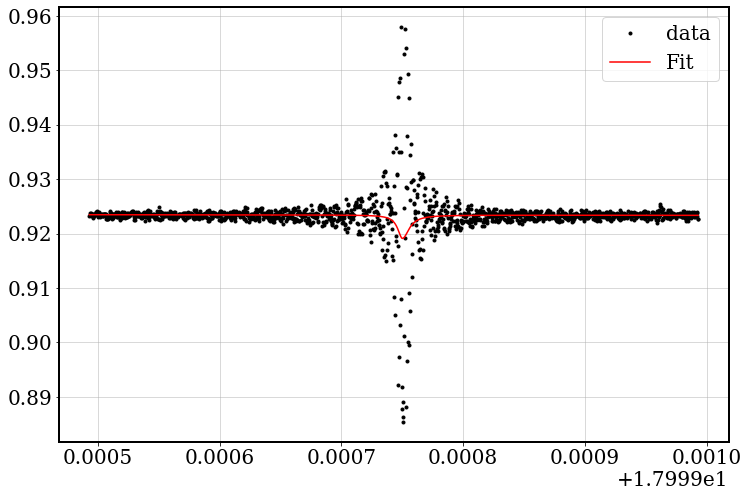

579
conversion is: dBm-W
[ 1.15266311e-05  1.56250000e-06  1.81751613e+01  4.23476391e+00
 -7.60453820e+01  1.00000000e+00] 
 [[-1.00000000e-03  1.25000000e-08  1.81751548e+01  4.23476391e-01
  -7.60453820e+02  0.00000000e+00]
 [ 1.00000000e-03  1.25000000e-03  1.81751672e+01  4.23476391e+01
  -7.60453820e+00  1.00000000e+02]]
Parametro  1 :  8.28054511763772e-09  +/-  4.3785022245474044e-09
Parametro  2 :  9.780680576591793e-07  +/-  6.218242961434014e-07
Parametro  3 :  18.17516102779914  +/-  6.995721771338559e-07
Parametro  4 :  4.234784762095701  +/-  69.16765269767299
Parametro  5 :  -76.04517704309058  +/-  1257.133197129942
Parametro  6 :  0.9774041929268267  +/-  1.4995302054932669
Q = 9.29e+06  +/-  0.35762960034097746


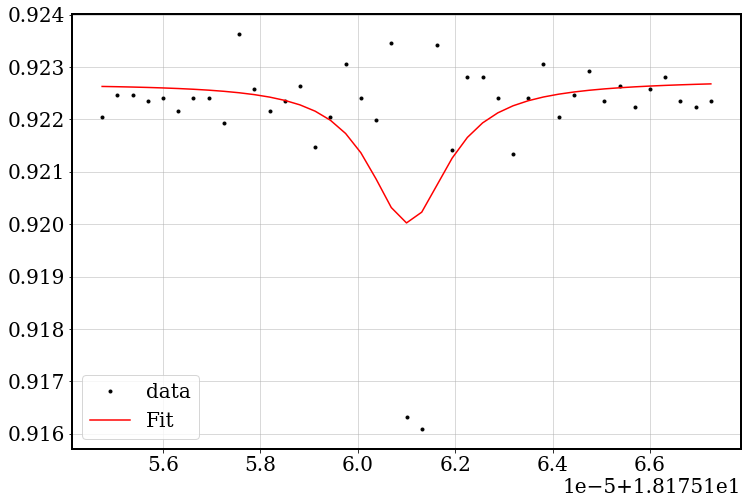

598
conversion is: dBm-W
[ 1.15119889e-05  1.56250001e-06  1.83458947e+01  3.06166355e+01
 -5.60768651e+02  1.00000000e+00] 
 [[-1.00000000e-03  1.25000000e-08  1.83458882e+01  3.06166355e+00
  -5.60768651e+03  0.00000000e+00]
 [ 1.00000000e-03  1.25000000e-03  1.83459007e+01  3.06166355e+02
  -5.60768651e+01  1.00000000e+02]]
Parametro  1 :  1.1473515591654043e-06  +/-  3.965128805105131e-05
Parametro  2 :  1.5506272551835068e-05  +/-  0.00021607367627198183
Parametro  3 :  18.34589551004218  +/-  1.958150793011529e-05
Parametro  4 :  30.617474956913927  +/-  4641.260413094752
Parametro  5 :  -560.7600257654551  +/-  85148.48902439022
Parametro  6 :  1.7311484417034277  +/-  5.597174294464427
Q = 5.92e+05  +/-  0.6314060282865852


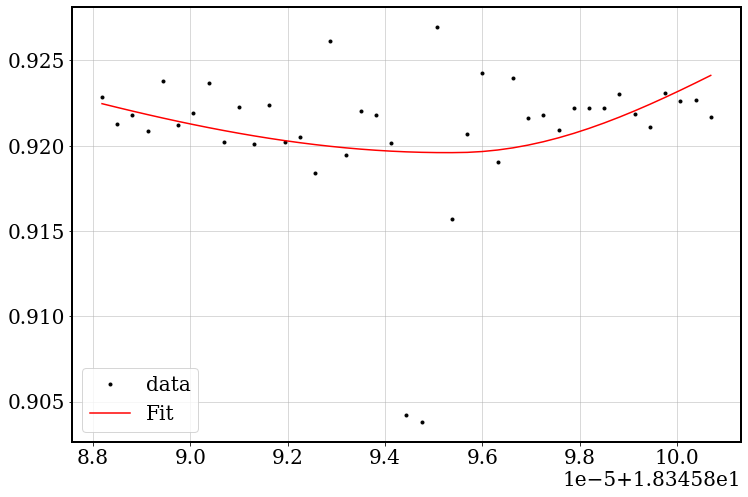

664
conversion is: dBm-W
[ 9.16098419e-05  1.56250000e-06  9.17865600e+00 -4.35506057e+01
  4.00672666e+02  1.00000000e+00] 
 [[-1.00000000e-03  9.78125000e-08  9.17860663e+00 -4.35506057e+02
   4.00672666e+01  0.00000000e+00]
 [ 1.00000000e-03  9.78125000e-03  9.17870444e+00 -4.35506057e+00
   4.00672666e+03  1.00000000e+02]]
Parametro  1 :  2.316227448040487e-06  +/-  1.155130109661786e-08
Parametro  2 :  2.2392397084342367e-06  +/-  1.3365222773637741e-08
Parametro  3 :  9.178655962434808  +/-  1.6742496392946923e-08
Parametro  4 :  -59.89649958769034  +/-  6.270473683432751
Parametro  5 :  550.7293117134352  +/-  57.55451981672845
Parametro  6 :  1.304501851107773  +/-  0.019999177291362236
Q = 2.05e+06  +/-  0.0037384332570304063


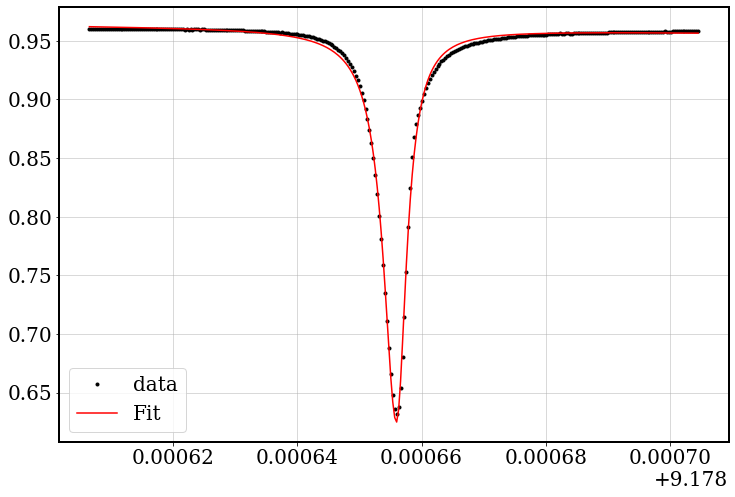

665
conversion is: dBm-W
[ 9.11812326e-05  1.56250000e-06  9.19967719e+00 -5.73790691e+01
  5.28801176e+02  1.00000000e+00] 
 [[-1.00000000e-03  9.78125000e-08  9.19962781e+00 -5.73790691e+02
   5.28801176e+01  0.00000000e+00]
 [ 1.00000000e-03  9.78125000e-03  9.19972562e+00 -5.73790691e+00
   5.28801176e+03  1.00000000e+02]]
Parametro  1 :  2.726827603405309e-06  +/-  1.5889750118860406e-08
Parametro  2 :  2.0999502454270597e-06  +/-  1.4171206965049352e-08
Parametro  3 :  9.199677281600511  +/-  1.780072615301857e-08
Parametro  4 :  -77.85198213459364  +/-  8.692312971762092
Parametro  5 :  717.1730536107627  +/-  79.96647195431352
Parametro  6 :  1.3717774548707473  +/-  0.02397985028816219
Q = 2.19e+06  +/-  0.004238368549869807


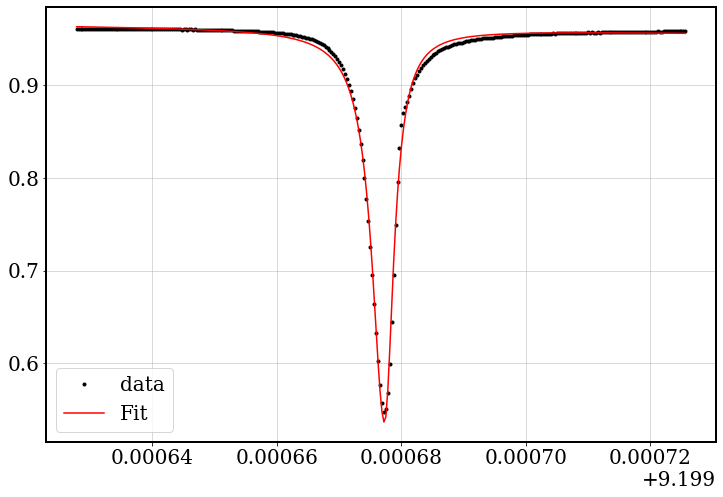

666
conversion is: dBm-W
[ 9.21171631e-05  1.56250000e-06  9.23913600e+00 -3.33954570e+01
  3.09486984e+02  1.00000000e+00] 
 [[-1.00000000e-03  9.78125000e-08  9.23908662e+00 -3.33954570e+02
   3.09486984e+01  0.00000000e+00]
 [ 1.00000000e-03  9.78125000e-03  9.23918444e+00 -3.33954570e+00
   3.09486984e+03  1.00000000e+02]]
Parametro  1 :  1.8548968907508955e-06  +/-  9.241112824093327e-09
Parametro  2 :  2.2463873501579135e-06  +/-  1.3370916428957144e-08
Parametro  3 :  9.239135924663318  +/-  1.675185285316677e-08
Parametro  4 :  -48.10349928220326  +/-  5.000921140277713
Parametro  5 :  445.3952559959783  +/-  46.204189775676674
Parametro  6 :  1.307505411485405  +/-  0.019997397134598843
Q = 2.06e+06  +/-  0.0037286207234005046


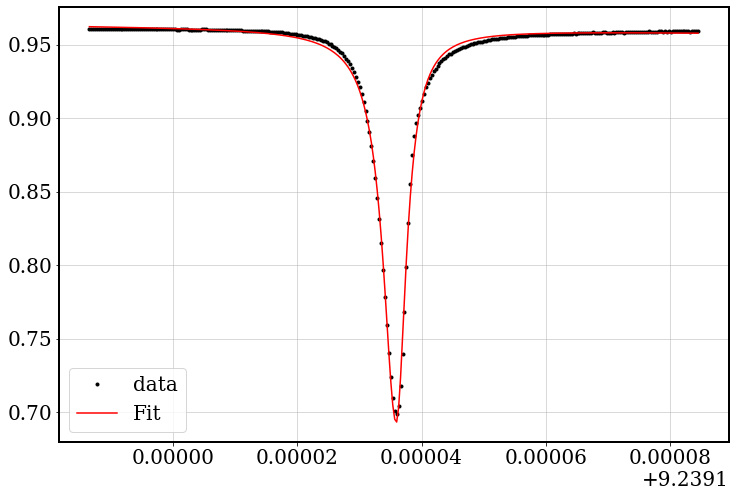

In [92]:
#Q = np.sort(reader.get_parameters('Q'))[-1]
#print(Q)
Q = reader.get_parameters('Q')
f = reader.get_parameters('f0')
d = reader.get_parameters('depth')

loc = np.intersect1d(np.where(Q>2e6)[0], np.where(d > 0.05)[0])

#loc = np.where(f>17)[0]

for l in loc:
    print(l)

    power = reader.get_resonance(loc=l)['power']
    freq = reader.get_resonance(loc=l)['freq']

    utils.fit_resonance(freq*1e-6, power, verbose=True, conversion=None)



[-2.45326445e-05  1.56250000e-06  9.29800913e+00 -1.94084703e+02
  1.80433268e+03  1.00000000e+00] 
 [[-1.00000000e-03  9.12500000e-08  9.29796287e+00 -1.94084703e+03
   1.80433268e+02  0.00000000e+00]
 [ 1.00000000e-03  9.12500000e-03  9.29805413e+00 -1.94084703e+01
   1.80433268e+04  1.00000000e+02]]
Parametro  1 :  8.649862272304378e-06  +/-  4.3390639952035415e-08
Parametro  2 :  2.0944845933291823e-06  +/-  1.2327634393300011e-08
Parametro  3 :  9.298009159252844  +/-  1.5437560448200388e-08
Parametro  4 :  -246.07879974766678  +/-  26.560706910757734
Parametro  5 :  2287.867895374713  +/-  246.96168513254773
Parametro  6 :  1.3412832546757574  +/-  0.02034571667321465
Q = 2.22e+06  +/-  0.0036852886140505436


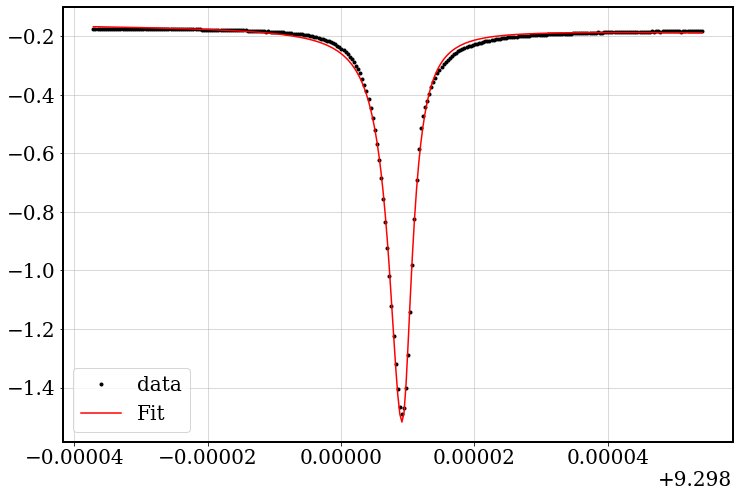

In [93]:
index = 4
power = reader.get_resonance(loc=index)['power']
freq = reader.get_resonance(loc=index)['freq']
utils.fit_resonance(freq*1e-6, power, verbose=True, conversion=None)

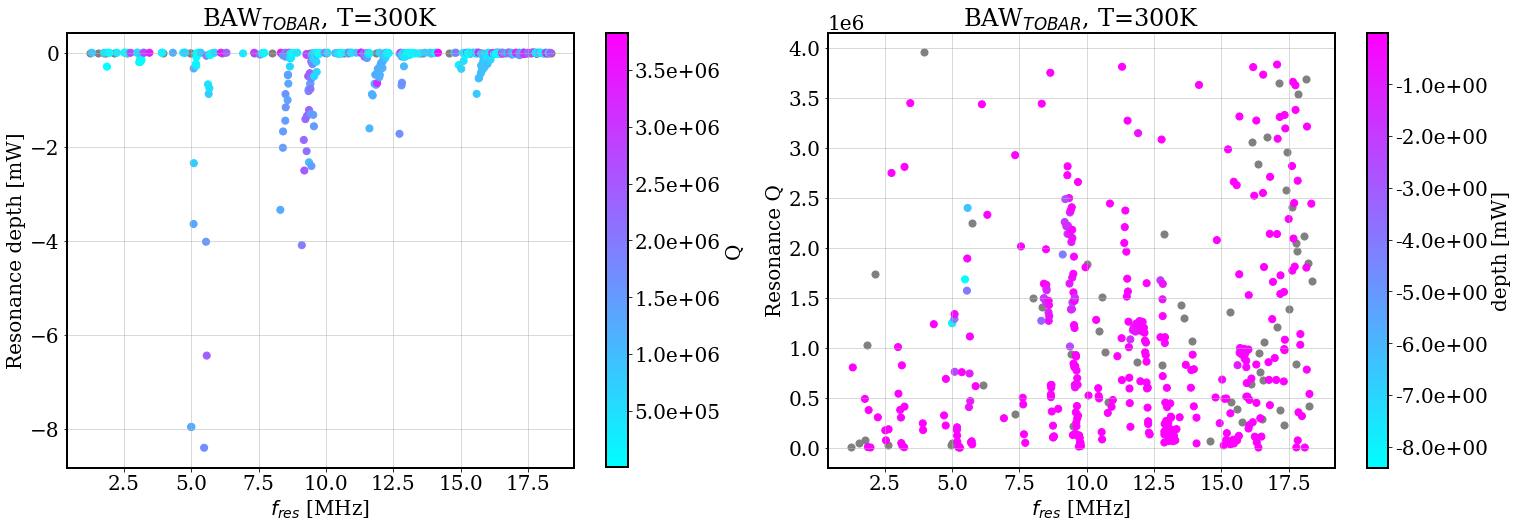

In [94]:
from matplotlib  import cm
depth = reader.get_parameters('depth')
Q = reader.get_parameters('Q')
peak_pos = reader.get_parameters('f0')


depth_thr = 0.00002 #è l'altezza dei picchi sotto la quale non plotta il Q valore
ii = np.where(depth>depth_thr)[0]
ii2 = np.where(depth<=depth_thr)[0]
ii3 = np.where((Q != -2) & (Q < 4e6) )[0]

ii = np.intersect1d(ii,ii3)
ii2 = np.intersect1d(ii2,ii3)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(25)

d = ax1.scatter(peak_pos[ii2],-depth[ii2],s=50,          marker = 'o', color='grey')
d = ax1.scatter(peak_pos[ii], -depth[ii], s=50, c=Q[ii], marker = 'o', cmap = cm.cool )
ax1.set_title(r'BAW$_{TOBAR}$, T=300K')
fig.colorbar(d,label='Q',format='%.1e', ax=ax1)
ax1.set_xlabel(r'$f_{res}$ [MHz]')
ax1.set_ylabel('Resonance depth [mW]')

e = ax2.scatter(peak_pos[ii2],Q[ii2],s=50,marker='o',color='grey')
e = ax2.scatter(peak_pos[ii], Q[ii],s=50, c=-depth[ii], marker = 'o', cmap = cm.cool )
ax2.set_title(r'BAW$_{TOBAR}$, T=300K')
fig.colorbar(e,label='depth [mW]',format='%.1e', ax=ax2)
ax2.set_xlabel(r'$f_{res}$ [MHz]')
ax2.set_ylabel('Resonance Q')

ax1.grid(alpha=0.6)
ax2.grid(alpha=0.6)

#plt.savefig('Scan_22.png')
plt.show()

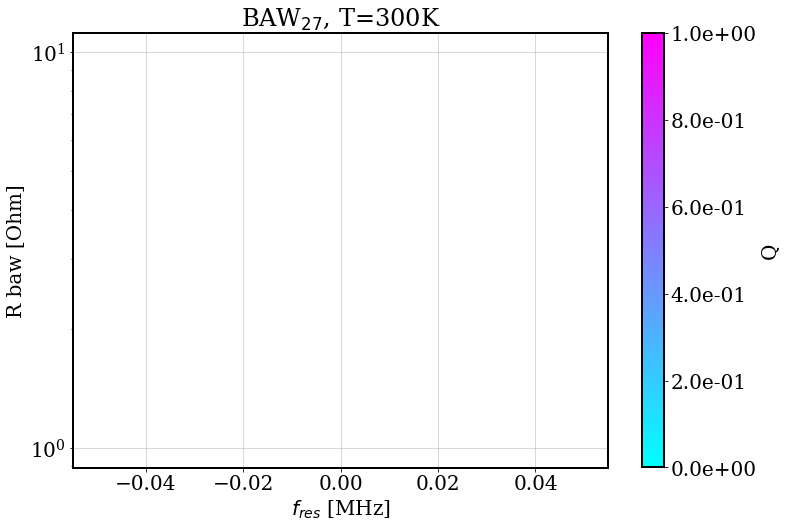

In [15]:
depth = reader.get_parameters('depth')
Q = reader.get_parameters('Q')
peak_pos = reader.get_parameters('f0')
R = reader.get_parameters('R_baw')
C = reader.get_parameters('C_baw')
L = reader.get_parameters('L_baw')

depth_thr = 0.02 #è l'altezza dei picchi sotto la quale non plotta il Q valore
ii = np.where(depth>depth_thr)[0]
ii2 = np.where(depth<=depth_thr)[0]
ii3 = np.where(Q > 1e6)[0]

ii = np.intersect1d(ii,ii3)
ii2 = np.intersect1d(ii2,ii3)

fig = plt.figure()
ax = fig.add_subplot(111)
#d =ax.scatter(peak_pos[ii2],R[ii2],s=50,marker='o',color='grey')
d =ax.scatter(peak_pos[ii],R[ii],s=50,c=Q[ii], marker = 'o', cmap = cm.cool )

plt.title(r'BAW$_{27}$, T=300K')
plt.colorbar(d,label='Q',format='%.1e')
plt.xlabel(r'$f_{res}$ [MHz]')
plt.ylabel('R baw [Ohm]')
plt.grid(alpha=0.6)
plt.yscale('log')
#plt.savefig('Scan_22.png')
plt.show()

